# Procesamiento de Imágenes - Trabajo Práctico N°4
## Grupo 3
* Santiago Arribere
* Matías Francois
* Joaquín Gaytan
* Pablo Scheinfeld

# Ejercicio 3
En este ejercicio se busca profundizar acerca de lo visto en clase acerca del *bit plane slicing*. Esta técnica consiste en descomponer a la imagen original en *N* imágenes, donde *N* es el número de bits en el que se encuentra codificada esta imagen. Luego, cada uno de los píxeles de estas imágenes contendrá un 1 en el caso de que la potencia de dos correspondiente al bit analizad está presente en el pixelo, y un 0 en caso contrario.

Se comienza por implementar la función *get_bitplanes*, que recibe una imagen y una lista de bitplanes a incluir, y devuelve una imagen que solo contiene los bit planes indicados.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def get_bitplanes(img, planes):
    
    """
    Returns the indicated bitplane from the supplied image.

    Parameters
    ----------
        'img':              array_like - Image to perform bitplane slicing.
        'plane':            array_like - Plane numbers to return, must be an array.

    Returns
    ----------
        'out':              array_like - Bit plane array in [0,255] range.
    """
        
    out = np.zeros(img.shape)
    for bp in planes:
        # Get bitplane
        out += (img & (1 << bp))
    return out 

# Ejemplo de clase

En primer lugar, se reproduce el ejemplo visto en clase. Para ello, se descompone a la imagen *fractal.jpg* en sus 8 bit planes (dado que esta imagen se encuentra codificada en 8 bits.

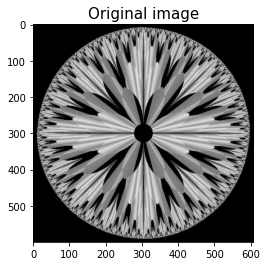

In [3]:
# Open image 
fractal_img = np.array(Image.open('../../assets/ej3/fractal.jpg'))
plt.title('Original image', fontsize=15)
plt.imshow(fractal_img, cmap='gray');

In [4]:
fractal_bitplanes = []
for i in range(8):
    # Compute all bitplanes
    fractal_bitplanes.append(get_bitplanes(fractal_img, [i]))
    
# Convert to numpy array
fractal_bitplanes = np.array(fractal_bitplanes)

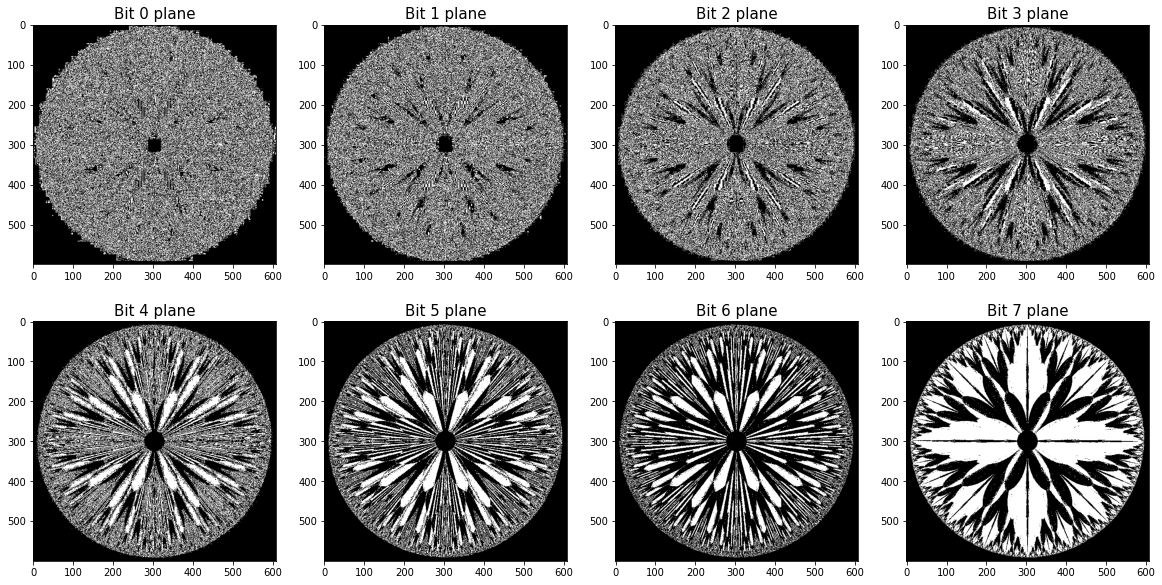

In [5]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i in range(2):
    for j in range(4):
        # Plot bitplane
        axs[i,j].imshow(fractal_bitplanes[4*i+j], cmap='gray')
        axs[i,j].set_title(f'Bit {4*i+j} plane', fontsize=15)

En la figura anterior se aprecian todos los bitplanes que contiene la imagen original. Respecto de la interpretación de estos bitplanes, se infiere que cuanto menos significativo sea el bit analizado menor es el detalle que contendrá el bitplane correspondiente. Opuestamente, los bitplanes más "altos" son los que expresan el valor de los bits más significativo, por lo que en ellos se observan los cambios más "bruscos" en la imagen original.

# Reconstrucción de una imagen a partir de sus bitplanes

Luego, se busca descomponer a la imagen *onedollar.jpg* en sus bitplanes para luego poder ser reconstruida empleando algunos de ellos.

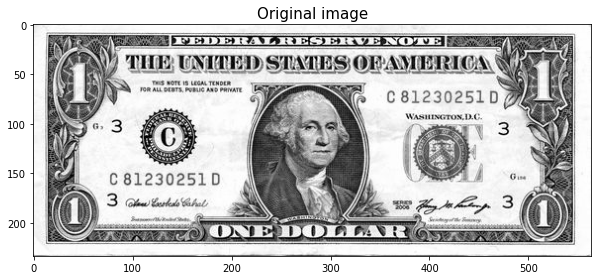

In [6]:
# Import image and convert it to grayscale
img = np.array(Image.open('../../assets/ej3/onedollar.jpg').convert('L'))

# Show image
plt.figure(figsize=(10,10))
plt.title('Original image', fontsize=15)
plt.imshow(img, cmap='gray');

In [7]:
dollar_bitplanes = []
for i in range(8):
    # Compute all bitplanes
    dollar_bitplanes.append(get_bitplanes(img, [i]))
    
# Convert to numpy array
dollar_bitplanes = np.array(dollar_bitplanes)

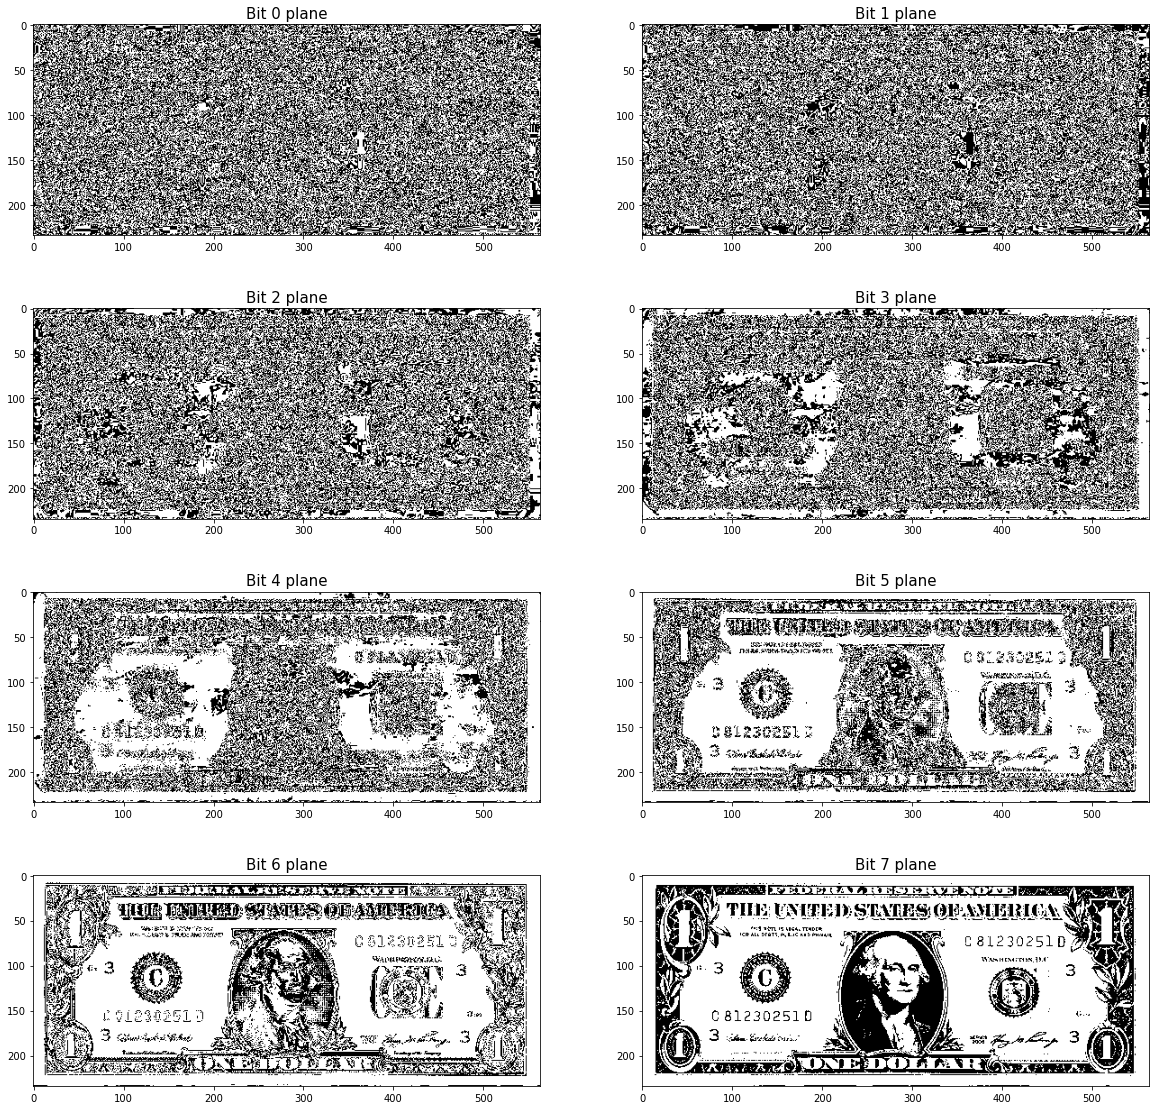

In [8]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

for i in range(4):
    for j in range(2):
        # Plot bitplane
        axs[i,j].imshow(dollar_bitplanes[2*i+j], cmap='gray')
        axs[i,j].set_title(f'Bit {2*i+j} plane', fontsize=15)

Nuevamente, se observa que los bit planes más signifiativos contienen una información más general de la imagen, dado que contienen las altas frecuencias de cambio. De hecho, observando los bit planes 5, 6 y 7 se infiere que la imagen es de un billete de un dolar. En el resto de los bitplanes es más difícil arribar a esta conclusión.

Continuando, se reconstruye a la imagen usando los planos  8-7-6-5-1 (7-6-5-4-0 según la indexación de Python). Se compara a esta imagen reconstruida con la original.

In [13]:
planes = [7, 6, 5, 4, 0]
rebuilt_img = get_bitplanes(img, planes)

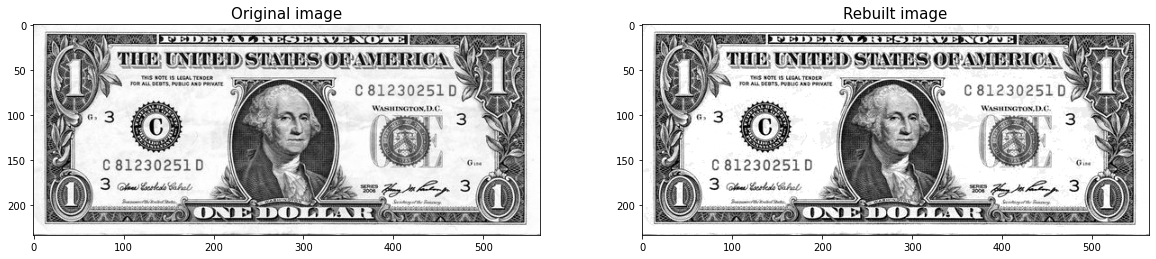

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].set_title('Original image', fontsize=15)
axs[1].set_title('Rebuilt image', fontsize=15)
axs[0].imshow(img, cmap='gray')
axs[1].imshow(rebuilt_img, cmap='gray');

A simple vista no se observan diferencias entre ambas imágenes. Esto sucede porque se dejan afuera bit planes poco significativos (1, 2 y 3). Luego, con la información de los bit planes más siognificativos alcanza para poder reconstruir e identificar satisfactoriamente a la imagen. Las variaciones menos significativas dejadas afuera no pueden ser identificadas propiamente por el ojo humano, en un análisis general.

A continuación se propone ir construyendo la imagen desde el bit plane 0, incorporando de a un plano por vez de forma acumulativa. El resultado se grafica abajo.

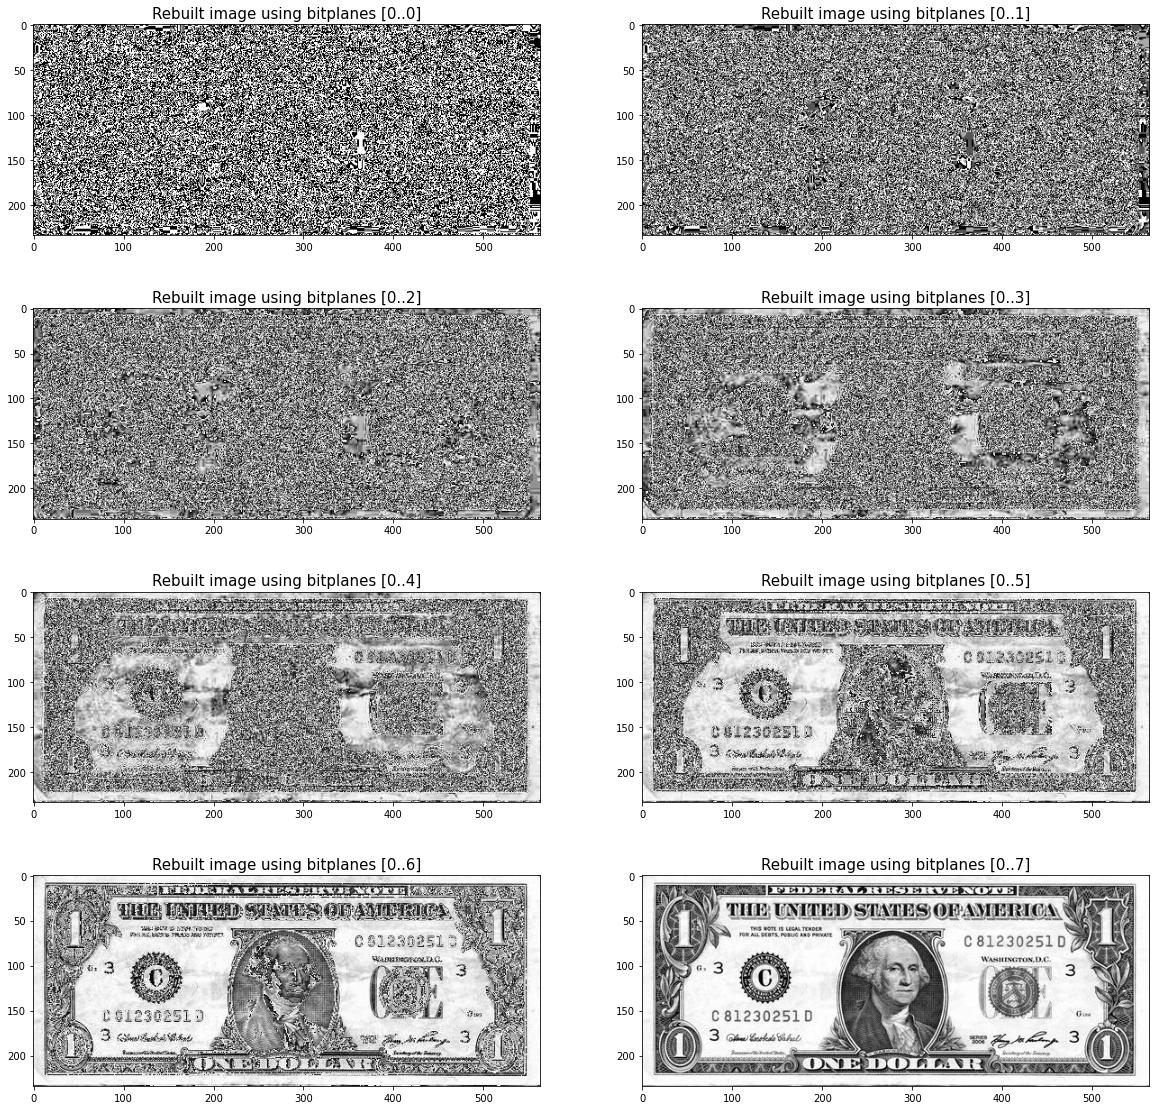

In [15]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

for i in range(4):
    for j in range(2):
        # Plot bitplane
        axs[i,j].imshow(get_bitplanes(img, [k for k in range(2*i+j+1)]), cmap='gray')
        axs[i,j].set_title(f'Rebuilt image using bitplanes [{0}..{2*i+j}]', fontsize=15)

Si se comienza reconstruyendo la imagen por el bit menos significativo, luego se identifica a la imagen luego de la quinta iteración aproximadamente. Hay cambios apreciables en la reconstrucción al agregar los bit planes más significativos.

Luego, se realiza la misma reconstrucción pero comenzando por el bit plane más significativo y se le van sumando los siguientes.

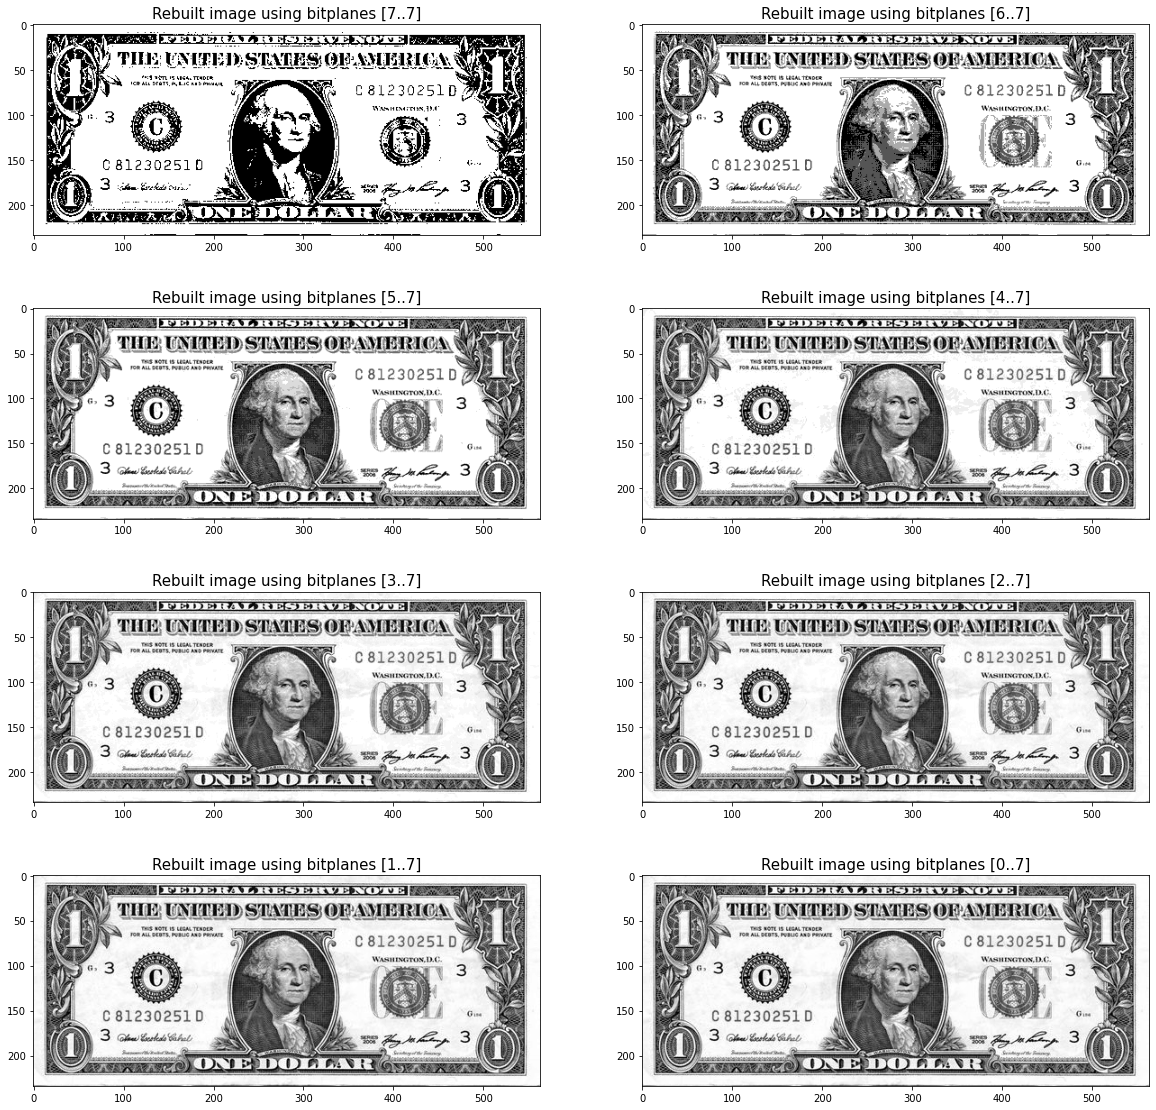

In [12]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

for i in range(4):
    for j in range(2):
        # Plot bitplane
        axs[i,j].imshow(get_bitplanes(img, [ (7-k) for k in range(2*i+j+1)]), cmap='gray')
        axs[i,j].set_title(f'Rebuilt image using bitplanes [{7- (2*i+j)}..{7}]', fontsize=15)

Al contrario de lo observado anteriormente, se puede identtificar la imagen desde la primera iteración. Además, a partir de la tercera iteración ya casi no se notan cambios en la reconstrucción. Esto implica que la información más importante de esta imagen (al menos, para el ojo humano) se encuentra en los primeros tres bit planes.